The best learning hub is: https://www.tensorflow.org/

__Goals__ of this tutorial: Understand the basic components of TensorFlow 

__Prerequisite__: Python, Numpy, Machine learning, Neural Network

__Now, let's make some bugs together!__

In [1]:
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.1.3


# 1.TensorFlow basics & fundamentals
## 1.1 Tensor and Variable

__Tensor:__ Similar to Numpy arrays, Tensors are __Multi-dimensioanl__ arrays of a uniform datatype. Unlike numpy arrays however, 1) Tensors are immutable; i.e. you can't update the contents of a tensor. 2)Tensors can be run on GPU/TPU which are much faster.  

__Variable:__ contains a tensor that is persistent and changeable across different Session.runs. They are usually the ones that are updated in back-propagations (e.g. the weights of a model)

For example, in Linear Regression:
<center><img src="images/tensor_graph_session.png" width="720" height="360"/></center>


In [9]:
# Create a tensor
myTensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])  # Shift-Tab to open doc string of any function
print(myTensor)
print("dtype:", myTensor.dtype)
print("shape:", myTensor.shape)
print("ndim:", myTensor.ndim)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
dtype: <dtype: 'float32'>
shape: (2, 2)
ndim: 2


In [12]:
# Some other common methods of instantiating tensors:

# Constants
zeros = tf.zeros(shape=(1,6))
ones = tf.ones(shape=(2,3))
eights = tf.constant(8, shape=(3,4))

print("\n Zeros:\n ", zeros)
print("\n Ones:\n ", ones)
print("\n Eights: ", eights)

# Randomly sampled
tf.random.set_seed(42)
normal = tf.random.normal(shape=(2,2), mean=0, stddev=1.)
uniform = tf.random.uniform(shape=(2,1), minval=0, maxval=10, dtype='int32')
poisson = tf.random.poisson((2,2), 5)

print("\n\n normal:\n ", normal)
print("\n uniform:\n ", uniform)
print("\n poisson: ", poisson)


 Zeros:
  tf.Tensor([[0. 0. 0. 0. 0. 0.]], shape=(1, 6), dtype=float32)

 Ones:
  tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)

 Eights:  tf.Tensor(
[[8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]], shape=(3, 4), dtype=int32)


 normal:
  tf.Tensor(
[[ 0.3274685 -0.8426258]
 [ 0.3194337 -1.4075519]], shape=(2, 2), dtype=float32)

 uniform:
  tf.Tensor(
[[8]
 [3]], shape=(2, 1), dtype=int32)

 poisson:  tf.Tensor(
[[3. 7.]
 [7. 6.]], shape=(2, 2), dtype=float32)


In [21]:
# Converting between Numpy Arrays and Tensorflow Tensors

# Numpy array to tensor

Array = np.arange(12)
print('Numpy array: ', Array)
print('Numpy dataType: ', Array.dtype)

Tensor = tf.constant(Array) 
print('Tensor: ', Tensor)

Numpy array:  [ 0  1  2  3  4  5  6  7  8  9 10 11]
Numpy dataType:  int64
Tensor:  tf.Tensor([ 0  1  2  3  4  5  6  7  8  9 10 11], shape=(12,), dtype=int64)


In [22]:
# Tensor to Numpy array 

Tensor.numpy()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [27]:
# create the same tensor with tf.Variable() 

mutable_tensor = tf.Variable([10, 7])
immutable_tensor = tf.constant([10, 7])

mutable_tensor, immutable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [25]:
mutable_tensor[0].assign(5)
mutable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([5, 7], dtype=int32)>

In [1]:
# immutable_tensor[0].assign(5)  # does not work as Tensor is immutable 
# immutable_tensor

### Other useful things about Tensor that you can practice on your own. (very similar to numpy)
__Tensor Indexing, Slicing, and Reshape, Tensor Math Operation, Aggregation__

#### a) A few basic math operations

In [ ]:
a = tf.constant([[1.0, 2.0], 
                 [3.0, 4.0]])
b = tf.constant([[1.0, 1.0], 
                 [1.0, 1.0]])


print(tf.add(a, b), "\n")
print(tf.subtract(a,b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

In [ ]:
# Equivalently
print(a + b, "\n") # element-wise addition
print(a - b, "\n") # element-wise subtraction
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

In [ ]:
# Taking the absolute value
abs_a = tf.abs(a)

# Raising to a power
pow_ba = tf.pow(a,b)

print("\n ", abs_a)
print("\n ", pow_ba)

#### b) Indexing, Slicing and Reshaping

The indexing, slicing and reshaping rules are similar to NumPy.

- index starts at 0
- colons `:` are used for slices `start:stop:step`

In [29]:
t1 = tf.constant([0, 1, 2, 3, 4, 5, 6, 7])

print(t1[1:4])

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [30]:
# Alternatively

print(tf.slice(t1,
               begin=[1],
               size=[3]))

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [31]:
# Reshaping

x = tf.constant(np.arange(16))

shape1 = [8,2]
shape2 = [4,4]
shape3 = [2,2,2,2]

# Create Tensors of different shape

a = tf.constant(x, shape=shape1)
print("\n a:\n ", a)

b = tf.constant(x, shape=shape2)
print("\n b:\n ", b)

c = tf.constant(x, shape=shape3)
print("\n c:\n ", c)


 a:
  tf.Tensor(
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]], shape=(8, 2), dtype=int64)

 b:
  tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]], shape=(4, 4), dtype=int64)

 c:
  tf.Tensor(
[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]], shape=(2, 2, 2, 2), dtype=int64)


In [32]:
# Expanding rank of Tensors

t1 = tf.expand_dims(c, 0)
t2 = tf.expand_dims(c, 1)
t3 = tf.expand_dims(c, 3)

print("\n After expanding dims:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


# Squeezing redundant dimensions

t1 = tf.squeeze(t1, 0)
t2 = tf.squeeze(t2, 1)
t3 = tf.squeeze(t3, 3)

print("\n After squeezing:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After expanding dims:
 t1 shape:  (1, 2, 2, 2, 2) 
 t2 shape:  (2, 1, 2, 2, 2) 
 t3 shape:  (2, 2, 2, 1, 2)

 After squeezing:
 t1 shape:  (2, 2, 2, 2) 
 t2 shape:  (2, 2, 2, 2) 
 t3 shape:  (2, 2, 2, 2)


In [33]:
# Math ops will return a Tensor. Most Tensor ops will also apply to Variables.

a = tf.Variable([[1.0, 2.0], 
                 [3.0, 4.0]])
b = tf.Variable(tf.ones(shape=(2,2), dtype=tf.float32))

# Element wise addition
print( a + b )

# Matrix multiplication
print( a @ b )

tf.Tensor(
[[2. 3.]
 [4. 5.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[3. 3.]
 [7. 7.]], shape=(2, 2), dtype=float32)


In [34]:
# We can also name our variables

x = tf.Variable(["Hello world!"], tf.string, name='string_var')
y  = tf.Variable([3.14159, 2.71828], tf.float64, name='float_var')

print(x.name)
print(y.name)

# By default, variables in models will acquire unique names automatically.

string_var:0
float_var:0


__Note:__ In practice, raraly you need to decide whether to use tf.constant or tf.Variable, however, use tf.constant and change it later if needed if in doubt.

## 1.2 Automatic Differentiation and Regression in Tensorflow

#### Gradient Tapes 

" TensorFlow provides the __tf.GradientTape__ API for __automatic differentiation__; that is, computing the gradient of a computation with respect to some inputs, usually __tf.Variables__. TensorFlow "records" relevant operations executed inside the context of a tf.GradientTape onto a "tape". TensorFlow then uses that tape to compute the gradients of a "recorded" computation using reverse mode differentiation. "

In [35]:
# An example

x = tf.Variable(initial_value=5.0)

with tf.GradientTape() as tape:
    y = tf.square(x)
    
# dy/dx = 2x
dy_dx = tape.gradient(y, x)

#print( dy_dx )
print( dy_dx.numpy() )

10.0


__Gradient Tape tracks only variables by default. However, it is also possible to track a constant tensor by calling `tape.watch()` on it:__

In [36]:
x = tf.constant(5.0)

with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.square(x)

    
# dy/dx = 2x
dy_dx = tape.gradient(y, x)

print( dy_dx.numpy() )

10.0


__GradientTape also works on list of inputs, and the inputs could be either scalars or high-dimensional tensors.__

In [46]:
w = tf.Variable(1.0, name='w')
b = tf.Variable(2.0, name='b')
x = 5.

with tf.GradientTape(persistent=True) as tape: #
    y = (x * w + b)
    z = y**2

[dz_dw, dz_db] = tape.gradient(z, [w, b])

# dz_dw = 2x(x*w + b); dz_db = 2(x*w + b)
print( dz_dw.numpy() )
print( dz_db.numpy() )


70.00001
14.000001


In [44]:
# The gradient has been calculated and done, even the variable is changed later, the gradient will not be updated 
w.assign(-10000000)
[dz_dw, dz_db] = tape.gradient(z, [w, b])
print(dz_dw.numpy())

-500000030.0


In [47]:
# It's also possible to compute gradients w.r.t intermediate results

dz_dy = tape.gradient(z, y)  # dz_dy = 2*(y) = 2*(x*w+b) = 2*(5*1+2) = 14
dz_dy.numpy()

14.000001

__It is even possible to compute second order derivatives with nested gradient tapes__

For example:

\begin{align}
\ s &= \frac{1}{2}at^2 \\
\end{align}

then,

$$ v = \frac{ds}{dt} $$
$$ a = \frac{dv}{dt} $$

In [ ]:
t = tf.Variable(0.)
a = tf.constant(9.8)

clock = tf.constant(2.); t.assign(clock)

with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        distance = (a/2)*(t**2)
    
    speed = inner_tape.gradient(distance, t)
acceleration = outer_tape.gradient(speed, t)


print(f'Speed at t={clock.numpy()} is {speed:.1f}')
print(f'Acceleration at t={clock.numpy()} is {acceleration:.1f}')

### Back to Linear Regression: An end to end example 

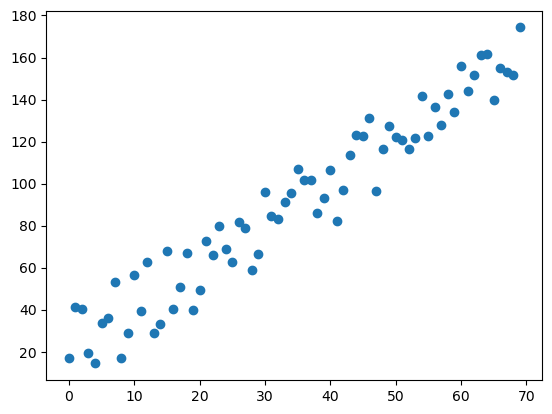

In [48]:
import matplotlib.pyplot as plt
X = np.arange(0,70, 1, dtype='float64')
Y = 2*X
noise = 40*np.random.rand(70) 
Y = 2*X + noise

plt.scatter(X, Y) 
plt.show()

In [49]:
w_init = np.random.randn(1)
b_init = np.random.randn(1)

w = tf.Variable(initial_value=w_init)
b = tf.Variable(initial_value=b_init)
X = tf.constant(X)
Y = tf.constant(Y)

alpha, epochs = 0.0001, 10000   # The learning Rate, The number of iterations to perform gradient descent

# Training the Neural Network
for i in range(epochs): 
    
    with tf.GradientTape() as tape:
        Y_pred = w*X + b
        Loss = tf.reduce_mean((Y - Y_pred )**2)
        
    # Compute Gradient
    dL_dw, dL_db = tape.gradient(Loss, [w, b])
    
    # Update Parameters
    w.assign_sub( alpha*dL_dw )
    b.assign_sub( alpha*dL_db )
    
    if i%1000 == 0:
        print( "Epoch {}, Loss : {}".format(i, Loss.numpy()))
print( "Epoch {}, Loss : {}".format(i, Loss.numpy()))

Epoch 0, Loss : 4861.288369546775
Epoch 1000, Loss : 206.56916759830958
Epoch 2000, Loss : 198.56161450500343
Epoch 3000, Loss : 191.3313767145707
Epoch 4000, Loss : 184.8029980829132
Epoch 5000, Loss : 178.90834720231888
Epoch 6000, Loss : 173.58590636906249
Epoch 7000, Loss : 168.78012957288698
Epoch 8000, Loss : 164.44086280821963
Epoch 9000, Loss : 160.52282065737904
Epoch 9999, Loss : 156.98847401183139


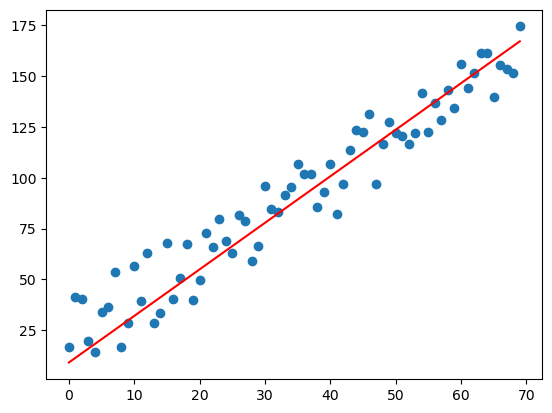

In [50]:
# Making predictions
Y_pred = w*X + b

plt.scatter(X, Y) 
plt.plot([X[0], X[-1]], [Y_pred[0], Y_pred[-1]], color='red')  # regression line
plt.show()